# **Import Library**


In [1]:
import pandas as pd
import csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import requests
from io import StringIO
import string
import json
import pickle

# Import pustaka Sastrawi
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

# Import beberapa package dari scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

# Import beberapa package Tensorflow dan Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau

# Import pustaka NLTK (Natural Language Toolkit).
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
!gdown 1yqcDktiMTaElesxqVIrl66vdcA0UR4Hv

Downloading...
From: https://drive.google.com/uc?id=1yqcDktiMTaElesxqVIrl66vdcA0UR4Hv
To: /content/ulasan_pubg.csv
100% 55.1M/55.1M [00:01<00:00, 36.2MB/s]


In [3]:
reviews_df = pd.read_csv('ulasan_pubg.csv')
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,155e9195-495b-4517-9c46-186727a42f2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mungkin alasan dev-game meluncurkan event even...,3,34,3.7.0,2025-04-03 13:14:42,"Pemain yang terhormat,\nKami sangat senang men...",2025-04-05 03:05:41,3.7.0
1,b7f48138-da4d-4d03-9d3b-2edd04d1ecd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya rasa PUBG dulu Lebih baik dari yang sekar...,5,208,3.7.0,2025-04-05 03:54:18,Hi pemain! Kami sepenuhnya memahami perasaan A...,2025-04-05 02:57:00,3.7.0
2,b29a7057-b121-4698-8606-e9da7b28f1d3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ada beberapa yang perlu dikoreksi dari segi uk...,4,6,3.7.0,2025-04-05 10:46:21,NaN,NaN,3.7.0
3,b1cf49da-487d-4fa6-a3c3-c109eee9dae1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,masih terdapat banyak bug dalam ingame diantar...,1,145,3.7.0,2025-04-05 11:53:28,Hai pemain! Kami telah memahami masalah yang A...,2025-04-07 07:44:13,3.7.0
4,aae620f0-a89a-4599-b0cc-6e0ebec3e35a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"update terlalu besar, terlalu pelit saat gacha...",2,3,3.7.0,2025-04-06 17:46:12,"Yang terhormat pemain,\nKami informasikan bahw...",2025-04-07 08:05:54,3.7.0


In [4]:
# Menampilkan informasi tentang DataFrame app_reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              108000 non-null  object
 1   userName              108000 non-null  object
 2   userImage             108000 non-null  object
 3   content               108000 non-null  object
 4   score                 108000 non-null  int64 
 5   thumbsUpCount         108000 non-null  int64 
 6   reviewCreatedVersion  74194 non-null   object
 7   at                    108000 non-null  object
 8   replyContent          36736 non-null   object
 9   repliedAt             36736 non-null   object
 10  appVersion            74194 non-null   object
dtypes: int64(2), object(9)
memory usage: 9.1+ MB


**Insight:**

• Dataset memiliki data ulasan sebanyak 108.000, yang diambil dari ulasan aplikasi PUBG Mobile di Google Playstore  
• Memiliki 11 fitur

**Keterangan Fitur:**  

• **reviewId**: ID unik untuk setiap ulasan  
• **userName**: Nama pengguna yang memberi ulasan  
• **userImage**: URL foto profil pengguna  
• **content**: Ulasan yang ditulis pengguna  
• **score**: Rating yang diberikan (1-5)  
• **thumbsUpCount**: Jumlah pengguna lain yang memberi 'like' atau setuju dengan ulasan tersebut  
• **reviewCreatedVersion**: Versi aplikasi ketika ulasan ditulis  
• **at**: Tanggal dan waktu ulasan diberikan  
• **replyContent**: Balasan dari pengembang aplikasi  
• **repliedAt**: Tanggal dan waktu balasan  
• **appVersion**: Versi aplikasi yang digunakan ketika memberi ulasan


In [5]:
# Drop data dengan missing values
clean_df = reviews_df.dropna()

# Memeriksa duplikasi data
print("Jumlah data duplikat:", reviews_df.duplicated().sum())

clean_df.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
Index: 25361 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              25361 non-null  object
 1   userName              25361 non-null  object
 2   userImage             25361 non-null  object
 3   content               25361 non-null  object
 4   score                 25361 non-null  int64 
 5   thumbsUpCount         25361 non-null  int64 
 6   reviewCreatedVersion  25361 non-null  object
 7   at                    25361 non-null  object
 8   replyContent          25361 non-null  object
 9   repliedAt             25361 non-null  object
 10  appVersion            25361 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.3+ MB


**Insight:**

• Terdapat beberapa missing values, ditangani dengan drop baris dengan missing values  
• Tidak ada data duplikat

# **Preprocessing Text**

In [6]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
from google.colab import files
uploaded = files.upload()

# Fungsi untuk load kamus dari file JSON
def load_slangwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        slang_words = json.load(file)
    return slang_words

# Fungsi untuk normalisasi slang words
def norm_slangwords(text, slangwords):
    words = text.split()
    norm_words = [slangwords[word.lower()] if word.lower() in slangwords else word for word in words]
    return ' '.join(norm_words)
slangwords = load_slangwords('/content/slangwords.json')

Saving slangwords.json to slangwords.json


In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(lambda x: norm_slangwords(x, slangwords))

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

<ipython-input-13-0051b5d6be97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
<ipython-input-13-0051b5d6be97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
<ipython-input-13-0051b5d6be97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,155e9195-495b-4517-9c46-186727a42f2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mungkin alasan dev-game meluncurkan event even...,3,34,3.7.0,2025-04-03 13:14:42,"Pemain yang terhormat,\nKami sangat senang men...",2025-04-05 03:05:41,3.7.0,Mungkin alasan devgame meluncurkan event event...,mungkin alasan devgame meluncurkan event event...,mungkin alasan devgame meluncurkan event event...,"[mungkin, alasan, devgame, meluncurkan, event,...","[alasan, devgame, meluncurkan, event, event, g...",alasan devgame meluncurkan event event game va...
1,b7f48138-da4d-4d03-9d3b-2edd04d1ecd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya rasa PUBG dulu Lebih baik dari yang sekar...,5,208,3.7.0,2025-04-05 03:54:18,Hi pemain! Kami sepenuhnya memahami perasaan A...,2025-04-05 02:57:00,3.7.0,Saya rasa PUBG dulu Lebih baik dari yang sekar...,saya rasa pubg dulu lebih baik dari yang sekar...,saya rasa pubg dulu lebih baik dari yang sekar...,"[saya, rasa, pubg, dulu, lebih, baik, dari, ya...","[pubg, berharap, developer, game, mengupdate, ...",pubg berharap developer game mengupdate game b...
3,b1cf49da-487d-4fa6-a3c3-c109eee9dae1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,masih terdapat banyak bug dalam ingame diantar...,1,145,3.7.0,2025-04-05 11:53:28,Hai pemain! Kami telah memahami masalah yang A...,2025-04-07 07:44:13,3.7.0,masih terdapat banyak bug dalam ingame diantar...,masih terdapat banyak bug dalam ingame diantar...,masih terdapat banyak bug dalam ingame diantar...,"[masih, terdapat, banyak, bug, dalam, ingame, ...","[bug, ingame, sinyal, ping, stabil, terkadang,...",bug ingame sinyal ping stabil terkadang mengak...
4,aae620f0-a89a-4599-b0cc-6e0ebec3e35a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"update terlalu besar, terlalu pelit saat gacha...",2,3,3.7.0,2025-04-06 17:46:12,"Yang terhormat pemain,\nKami informasikan bahw...",2025-04-07 08:05:54,3.7.0,update terlalu besar terlalu pelit saat gacha ...,update terlalu besar terlalu pelit saat gacha ...,update terlalu besar terlalu pelit saat gacha ...,"[update, terlalu, besar, terlalu, pelit, saat,...","[update, pelit, gacha, pengalaman, bermain, me...",update pelit gacha pengalaman bermain menyenan...
7,a8c91174-4e8f-43fc-ac71-fc81448ea75c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa pas main di cheer park semua mobil/kend...,4,2912,3.7.0,2025-03-22 13:07:38,"Yang terhormat pemain,\nKami menghargai masuka...",2025-01-12 08:46:35,3.7.0,Kenapa pas main di cheer park semua mobilkenda...,kenapa pas main di cheer park semua mobilkenda...,kenapa pas main di cheer park semua mobilkenda...,"[kenapa, pas, main, di, cheer, park, semua, mo...","[pas, main, cheer, park, mobilkendaraan, ditem...",pas main cheer park mobilkendaraan ditempat pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107988,5c36fcef-170b-44d1-83b2-ac30899c7fb3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong update sekarang sering terjadi masalah ...,1,1,3.2.0,2024-06-10 11:56:02,"Halo pemain,\nKami sangat mementingkan masalah...",2024-06-11 10:23:05,3.2.0,Tolong update sekarang sering terjadi masalah ...,tolong update sekarang sering terjadi masalah ...,tolong update sekarang sering terjadi masalah ...,"[tolong, update, sekarang, sering, terjadi, ma...","[tolong, update, eror, ubah, link, terimakasih]",tolong update eror ubah link terimakasih
107992,230430a3-569f-45ae-b44b-8e5c0203c5a4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa pemula gak bisa download ya padahal uda...,2,1,3.3.0,2024-07-31 13:10:49,"Yang terhormat pemain, \nKami sangat mementing...",2024-08-01 00:38:00,3.3.0,Kenapa pemula gak bisa download ya padahal uda...,

# **Pelabelan**

In [15]:
# Fungsi untuk mendapatkan data lexicon
def get_lexicon_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        lexicon = {line.strip() for line in response.text.splitlines() if line.strip()}
        return lexicon
    except requests.exceptions.RequestException as error:
        print(f"Error accessing {url}: {error}")
        return set()

# URL untuk positif dan negatif
positive_url = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt"
negative_url = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt"

# Fetch positive and negative lexicons
positive_words = get_lexicon_data(positive_url)
negative_words = get_lexicon_data(negative_url)

# Menampilkan distribusi jumlah
print(f"Jumlah Kata Positif: {len(positive_words)}")
print(f"Jumlah Kata Negatif: {len(negative_words)}")

Jumlah Kata Positif: 1182
Jumlah Kata Negatif: 2402


In [16]:
# Fungsi untuk menentukan polaritas sentimen

def sentiment_analysis(text):
    positive_count = 0
    negative_count = 0

    for word in text:
        if (word in positive_words):
            positive_count += 1
        elif word in negative_words:
            negative_count += 1

# Tentukan skor sentimen
    sentiment_score = positive_count - negative_count

    # Tentukan label sentimen
    if sentiment_score > 0:
        sentiment_label = 'positive'
    elif sentiment_score < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return sentiment_score, sentiment_label

# Aplikasi Sentimen
def apply_sentiment_analysis(text_column):
    sentiment_scores = []
    sentiment_labels = []

    for text in text_column:
        # Pastikan text sudah dalam bentuk token (list kata)
        if isinstance(text, str):
            text = text.split()  # Tokenisasi jika diperlukan
        score, label = sentiment_analysis(text)
        sentiment_scores.append(score)
        sentiment_labels.append(label)

    return sentiment_scores, sentiment_labels

# Terapkan analisis sentimen
scores, labels = apply_sentiment_analysis(clean_df['text_stopword'])

# Tambahkan hasil ke DataFrame
clean_df['sentiment_score'] = scores
clean_df['label'] = labels

# Hitung jumlah sentimen
sentiment_counts = clean_df['label'].value_counts()
print(sentiment_counts)

label
negative    10247
positive     7784
neutral      7330
Name: count, dtype: int64


<ipython-input-16-0d39f6f8ec9a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sentiment_score'] = scores
<ipython-input-16-0d39f6f8ec9a>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['label'] = labels


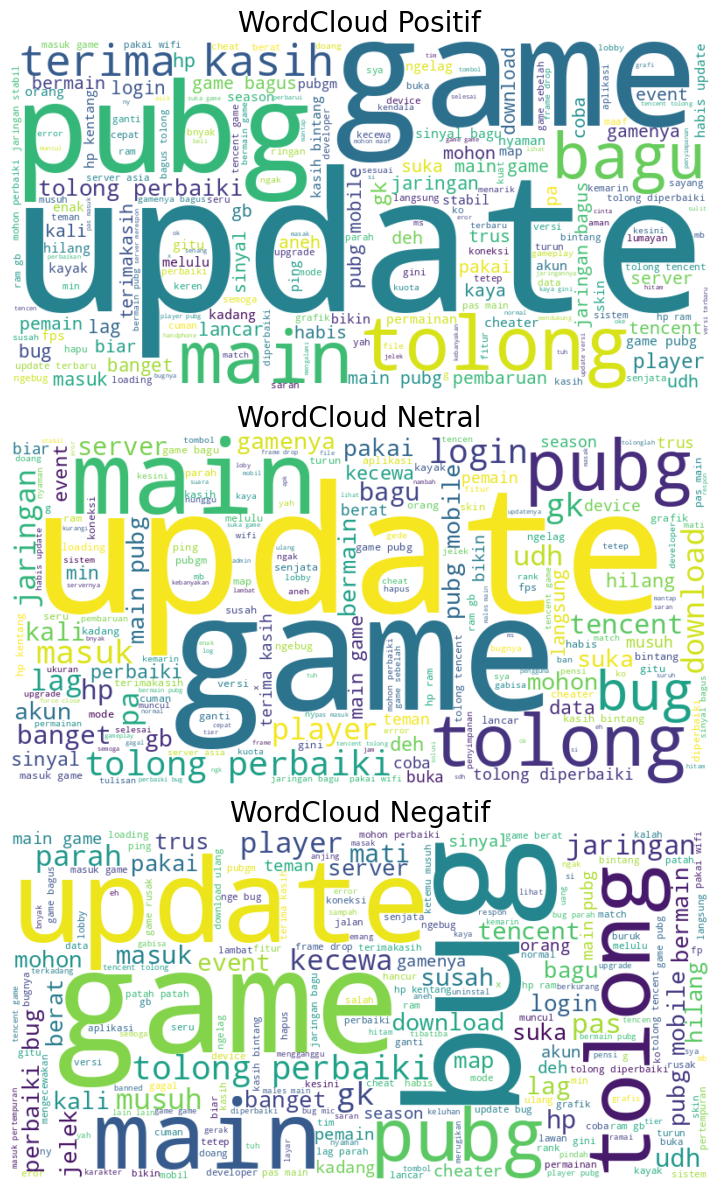

In [17]:
# Visualisasi WordCloud berdasarkan sentimen
# Daftar label sentimen dan warna judul
sentiments = ['positive', 'neutral', 'negative']
titles = ['WordCloud Positif', 'WordCloud Netral', 'WordCloud Negatif']

# Ukuran figure
plt.figure(figsize=(10, 12))

for i, sentiment in enumerate(sentiments):
    # Filter data berdasarkan sentimen
    filtered_df = clean_df[clean_df['label'] == sentiment]
    text = ' '.join(filtered_df['text_akhir'].dropna())

    # Buat wordcloud jika ada teks
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Plot dalam subplot
        plt.subplot(3, 1, i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titles[i], fontsize=20)
    else:
        print(f"Tidak ada data untuk sentimen: {sentiment}")

plt.tight_layout()
plt.show()

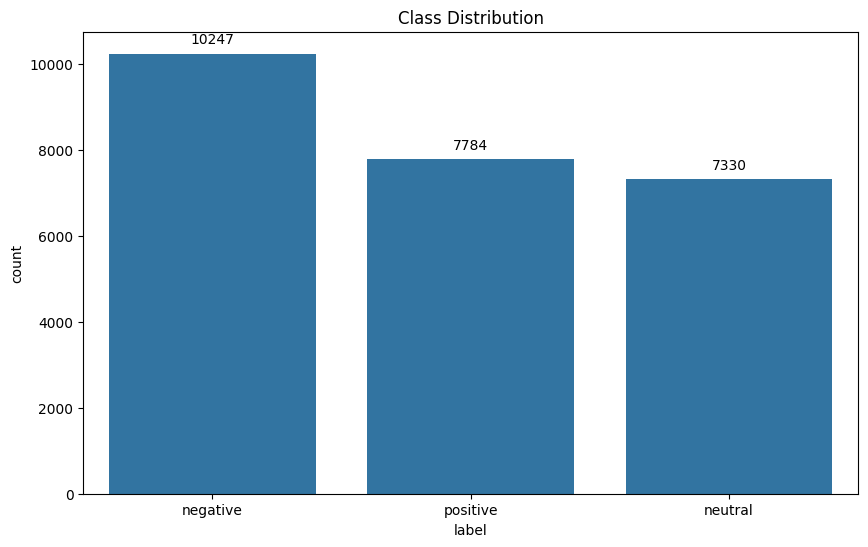

<ipython-input-18-cd7d55864eef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))


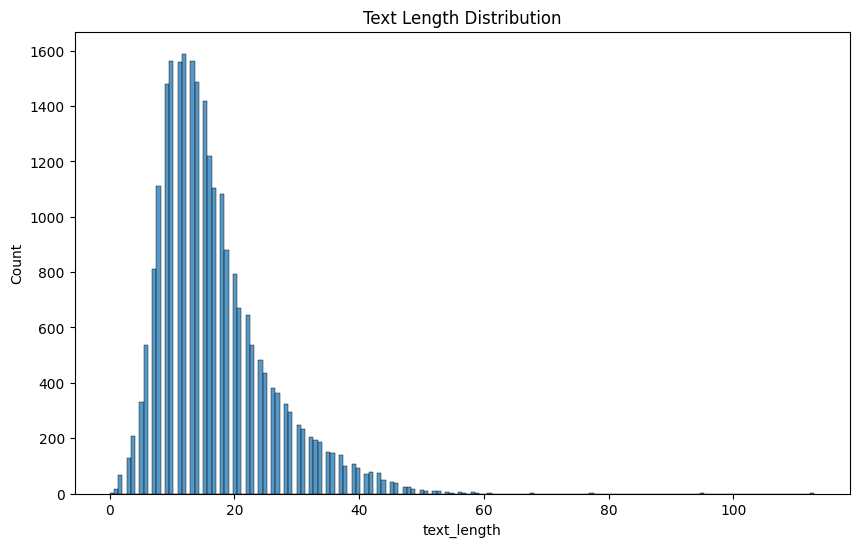

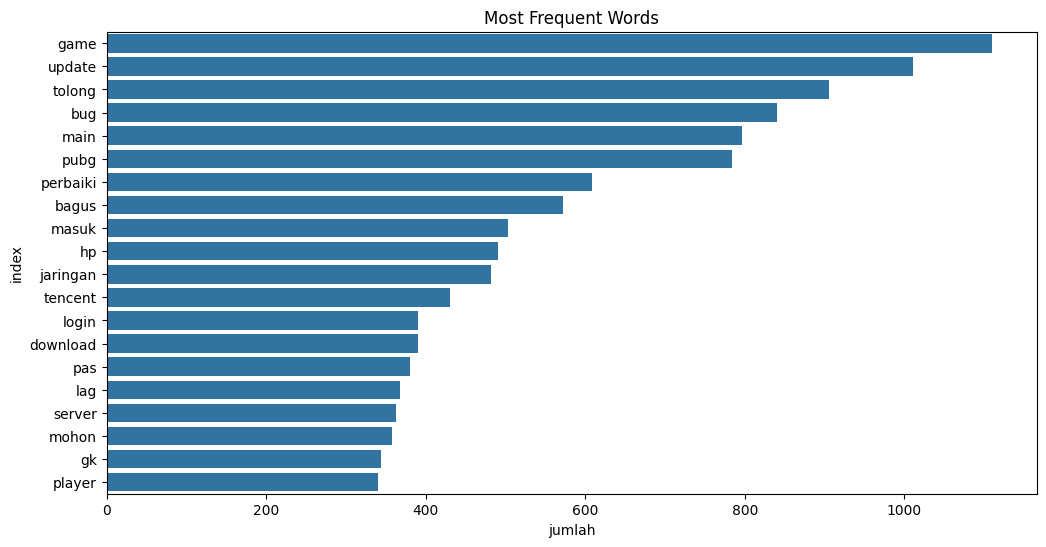

In [18]:
# Visualisasi Distribusi kelas
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='label', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# Visualisasi Distribusi panjang teks
plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Visualisasi Frekuensi kata terbanyak
plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

**Insight:**

• Hasil visualisasi distribusi setiap kelas menunjukkan bahwa ulasan negatif merupakan kelas paling banyak dengan 13.934 ulasan  
• Penggunaan kata terbanyak pada ulasan adalah *game*, *update*, *tolong*, dan *bug*. Kata-kata tersebut dapat diindikasikan bahwa aplikasi PUBG Mobile memiliki beberapa kekurangan yang berdampak pada penggunaan aplikasi, dan membutuhkan pembaharuan yang signifikan.

In [19]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment_score,label,text_length
0,155e9195-495b-4517-9c46-186727a42f2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mungkin alasan dev-game meluncurkan event even...,3,34,3.7.0,2025-04-03 13:14:42,"Pemain yang terhormat,\nKami sangat senang men...",2025-04-05 03:05:41,3.7.0,Mungkin alasan devgame meluncurkan event event...,mungkin alasan devgame meluncurkan event event...,mungkin alasan devgame meluncurkan event event...,"[mungkin, alasan, devgame, meluncurkan, event,...","[alasan, devgame, meluncurkan, event, event, g...",alasan devgame meluncurkan event event game va...,-2,negative,37
1,b7f48138-da4d-4d03-9d3b-2edd04d1ecd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya rasa PUBG dulu Lebih baik dari yang sekar...,5,208,3.7.0,2025-04-05 03:54:18,Hi pemain! Kami sepenuhnya memahami perasaan A...,2025-04-05 02:57:00,3.7.0,Saya rasa PUBG dulu Lebih baik dari yang sekar...,saya rasa pubg dulu lebih baik dari yang sekar...,saya rasa pubg dulu lebih baik dari yang sekar...,"[saya, rasa, pubg, dulu, lebih, baik, dari, ya...","[pubg, berharap, developer, game, mengupdate, ...",pubg berharap developer game mengupdate game b...,-2,negative,24
3,b1cf49da-487d-4fa6-a3c3-c109eee9dae1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,masih terdapat banyak bug dalam ingame diantar...,1,145,3.7.0,2025-04-05 11:53:28,Hai pemain! Kami telah memahami masalah yang A...,2025-04-07 07:44:13,3.7.0,masih terdapat banyak bug dalam ingame diantar...,masih terdapat banyak bug dalam ingame diantar...,masih terdapat banyak bug dalam ingame diantar...,"[masih, terdapat, banyak, bug, dalam, ingame, ...","[bug, ingame, sinyal, ping, stabil, terkadang,...",bug ingame sinyal ping stabil terkadang mengak...,1,positive,31
4,aae620f0-a89a-4599-b0cc-6e0ebec3e35a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"update terlalu besar, terlalu pelit saat gacha...",2,3,3.7.0,2025-04-06 17:46:12,"Yang terhormat pemain,\nKami informasikan bahw...",2025-04-07 08:05:54,3.7.0,update terlalu besar terlalu pelit saat gacha ...,update terlalu besar terlalu pelit saat gacha ...,update terlalu besar terlalu pelit saat gacha ...,"[update, terlalu, besar, terlalu, pelit, saat,...","[update, pelit, gacha, pengalaman, bermain, me...",update pelit gacha pengalaman bermain menyenan...,-2,negative,15
7,a8c91174-4e8f-43fc-ac71-fc81448ea75c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa pas main di cheer park semua mobil/kend...,4,2912,3.7.0,2025-03-22 13:07:38,"Yang terhormat pemain,\nKami menghargai masuka...",2025-01-12 08:46:35,3.7.0,Kenapa pas main di cheer park semua mobilkenda...,kenapa pas main di cheer park semua mobilkenda...,kenapa pas main di cheer park semua mobilkenda...,"[kenapa, pas, main, di, cheer, park, semua, mo...","[pas, main, cheer, park, mobilkendaraan, ditem...",pas main cheer park mobilkendaraan ditempat pa...,4,positive,29


In [20]:
# Pisahkan data menjadi fitur dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['label']

## **Skema 1**

In [21]:
# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(sequences, maxlen=100)
y = to_categorical(LabelEncoder().fit_transform(clean_df['label']))

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model LSTM
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(3, activation='softmax')
])
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

model1.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64, verbose=1, callbacks=callbacks)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


317/317 ━━━━━━━━━━━━━━━━━━━━ 115s 350ms/step - accuracy: 0.5584 - loss: 0.8825 - val_accuracy: 0.8498 - val_loss: 0.4093 - learning_rate: 0.0010
Epoch 2/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 114s 361ms/step - accuracy: 0.8641 - loss: 0.3590 - val_accuracy: 0.9091 - val_loss: 0.2718 - learning_rate: 0.0010
Epoch 3/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 140s 355ms/step - accuracy: 0.9241 - loss: 0.2170 - val_accuracy: 0.9093 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 4/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 141s 351ms/step - accuracy: 0.9488 - loss: 0.1514 - val_accuracy: 0.9265 - val_loss: 0.2258 - learning_rate: 0.0010
Epoch 5/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 145s 362ms/step - accuracy: 0.9642 - loss: 0.1027 - val_accuracy: 0.9330 - val_loss: 0.2193 - learning_rate: 0.0010
Epoch 6/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 139s 354ms/step - accuracy: 0.9706 - loss: 0.0892 - val_accuracy: 0.9397 - val_loss: 0.2106 - learning_rate: 0.0010
Epoch 7/15
317/317 ━━━━━━━━━━━━━━━━━━━━ 138s 341ms/step - accuracy: 0.9795 

In [22]:
# Evaluasi
train_loss, train_acc = model1.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9956
Test Accuracy: 0.9466


## **Skema 2**

In [23]:
# Ekstraksi Fitur TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(clean_df['text_akhir'])

# Label encoding
le = LabelEncoder()
y = le.fit_transform(clean_df['label'])

# Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42, stratify=y)

# Train SVM model
model2 = LinearSVC()
model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [24]:
# Evaluasi
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))

Training Accuracy: 0.9611
Testing Accuracy: 0.8292


## **Skema 3**

In [25]:
# Ekstraksi Fitur dengan BoW
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(clean_df['text_akhir']).toarray()

# Encode label
le = LabelEncoder()
y = le.fit_transform(clean_df['label'])
y = to_categorical(y)

# Split Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model DNN
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Training
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5632 - loss: 0.8840 - val_accuracy: 0.8671 - val_loss: 0.3894
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8743 - loss: 0.3534 - val_accuracy: 0.9152 - val_loss: 0.2652
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9372 - loss: 0.1886 - val_accuracy: 0.9212 - val_loss: 0.2424
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9606 - loss: 0.1228 - val_accuracy: 0.9310 - val_loss: 0.2293
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9688 - loss: 0.0905 - val_accuracy: 0.9338 - val_loss: 0.2335


In [26]:
# Evaluasi
train_loss, train_acc = model3.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9940
Test Accuracy: 0.9338


In [27]:
# Simpan hasil akurasi dari masing-masing skema
skema_data = {
    "Skema": [
        "Skema 1: Tokenizer + LSTM (80:20)",
        "Skema 2: TF-IDF + SVM (70:30)",
        "Skema 3: BoW + DNN (80:20)"
    ],
    "Akurasi Train": [
        0.9928,
        0.9609,
        0.9936
    ],
    "Akurasi Test": [
        0.9432,
        0.842,
        0.9336
    ]
}

# Buat DataFrame perbandingan
df_perbandingan = pd.DataFrame(skema_data)

# Tampilkan
print("Perbandingan Akurasi Tiga Skema Pelatihan:")
display(df_perbandingan.sort_values(by='Akurasi Test', ascending=False))

Perbandingan Akurasi Tiga Skema Pelatihan:


,Skema,Akurasi Train,Akurasi Test
0,Skema 1: Tokenizer + LSTM (80:20),0.9928,0.9432
2,Skema 3: BoW + DNN (80:20),0.9936,0.9336
1,Skema 2: TF-IDF + SVM (70:30),0.9609,0.8420


**Insight:**  
Perbandingan akurasi 3 skema pelatihan menunjukkan bahwa model dengan penggabungan ekstraksi fitur Tokenizer dan algoritma LSTM memiliki akurasi test tertinggi sebesar 94.32%. Maka skema tersebut akan dipilih sebagai model utama yang digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.


In [28]:
import joblib

# Simpan model
model1.save('LSTM_model.keras')

In [29]:
# Simpan vectorizer
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [30]:
from google.colab import files

files.download('LSTM_model.keras')
files.download('tokenizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>